# Build an ML algo to predict the rating of a restaurant

### Explore the Data

In [1]:
import pandas as pd

In [2]:
# read csv data
df = pd.read_csv("zomato.csv")

In [3]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [4]:
df.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [5]:
# Dropping Url and Phone no as they are useless for this project.dish_like more than 50% vslues are missing so drop(if i fill missing it lead to data leakage)
df.drop(['url','phone','dish_liked'], axis =1, inplace=True)

In [6]:
#finding duplicat
df.duplicated().sum()

43

In [7]:
# drop 43 duplicat
df.drop_duplicates(inplace=True)

In [8]:
# Remove the NaN values from the dataset
df.dropna(how='any',inplace=True)

In [9]:
df.shape

(43499, 14)

#### cleaning the data

In [10]:
# conver rate column to float
df["rate"] = df["rate"].str.split("/").str[0]
df["rate"] = df["rate"].replace("NEW", 0)
df["rate"] = df["rate"].replace("NaN", 0)
df["rate"] = df["rate"].replace("-", 0)
df["rate"] = df["rate"].astype(float)

In [11]:
# conver approx_cost(for two people) column to float
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].astype(str)
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].apply(lambda x: x.replace(',','.'))
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].astype(float)

In [12]:
df.isnull().sum()

address                        0
name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
location                       0
rest_type                      0
cuisines                       0
approx_cost(for two people)    0
reviews_list                   0
menu_item                      0
listed_in(type)                0
listed_in(city)                0
dtype: int64

## Data Visualization

In [13]:
df.head(3)

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari


### Restaurants delivering Online or not

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
df["book_table"].value_counts()

No     37073
Yes     6426
Name: book_table, dtype: int64

Text(0.5, 1.0, 'Restaurants delivering Online or not')

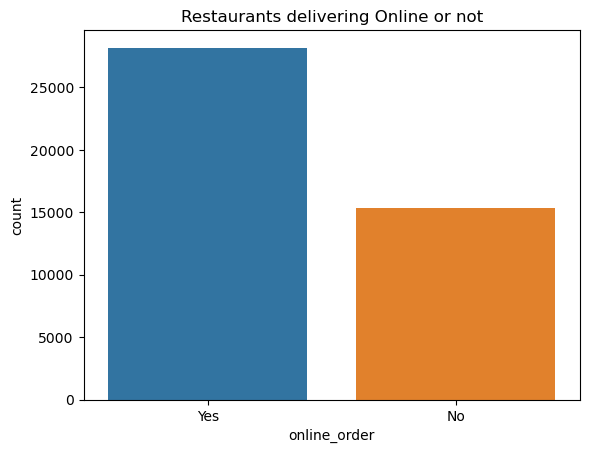

In [16]:
sns.countplot(x=df['online_order'])
plt.title('Restaurants delivering Online or not')

From the above graph, we can see that 2/3 of the restaurants deliver online.

### Restaurants allowing table booking or not

Text(0.5, 1.0, 'Restaurants allowing table booking or not')

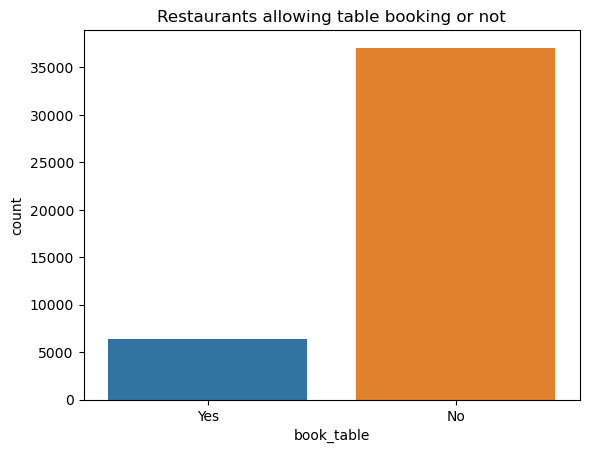

In [17]:
sns.countplot(x=df['book_table'])
plt.title('Restaurants allowing table booking or not')

From the above graph, we can see that most restaurants allow table booking.

### Table booking Rate vs Rate

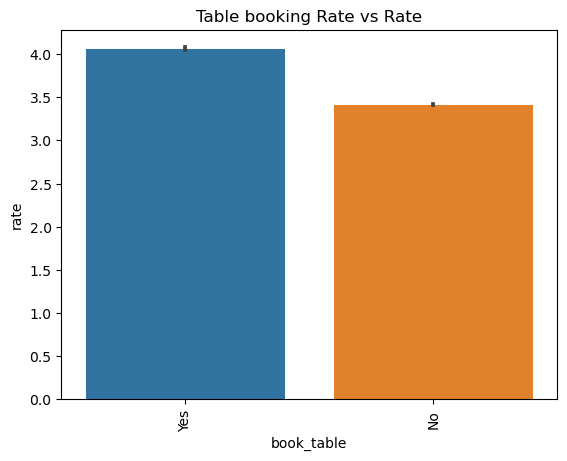

In [18]:
sns.barplot(data=df, x = 'book_table' , y = 'rate')
plt.xticks(rotation=90)
plt.title('Table booking Rate vs Rate')
plt.show()

From the above graph, we can see that most restaurants have higher ratings if they allow table booking table.

### Best Location

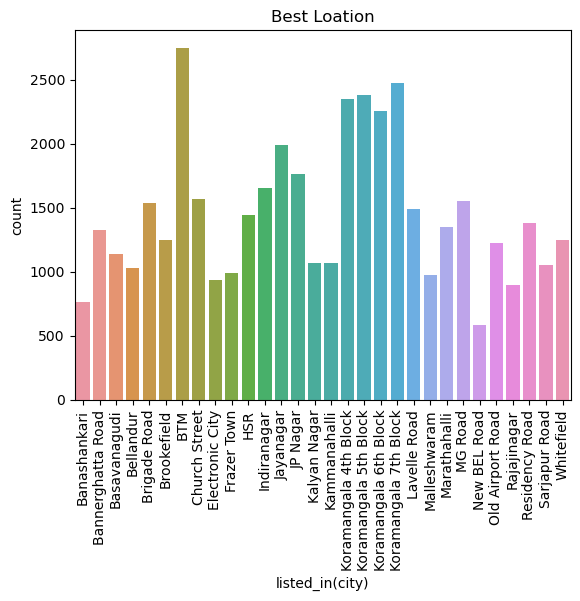

In [19]:
sns.countplot(x=df['listed_in(city)'])
plt.xticks(rotation=90)
plt.title('Best Loation')
plt.show()

From the above graph, we can see that BTM city has more customers and New BEL road has very few customers.

### Relation between Location and Rating

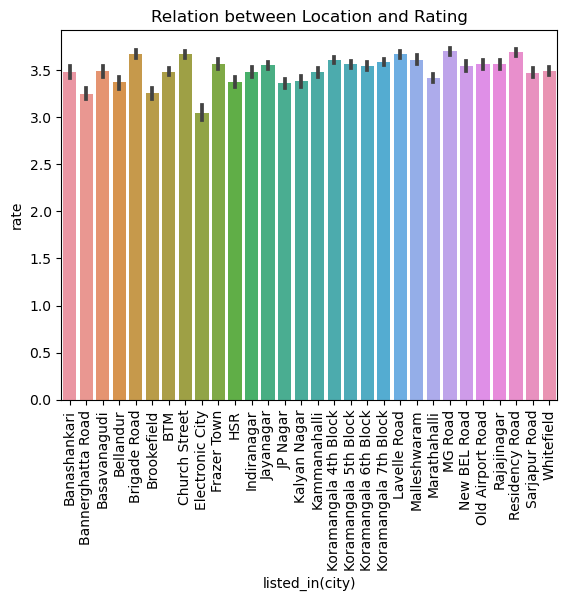

In [20]:
sns.barplot(data=df, x = 'listed_in(city)' , y = 'rate')
plt.xticks(rotation=90)
plt.title('Relation between Location and Rating')
plt.show()

From the above graph, we can say that the ratings vary based on the city. However, the difference is very small because the ratings are between 3 and 4.

### Restaurant Type

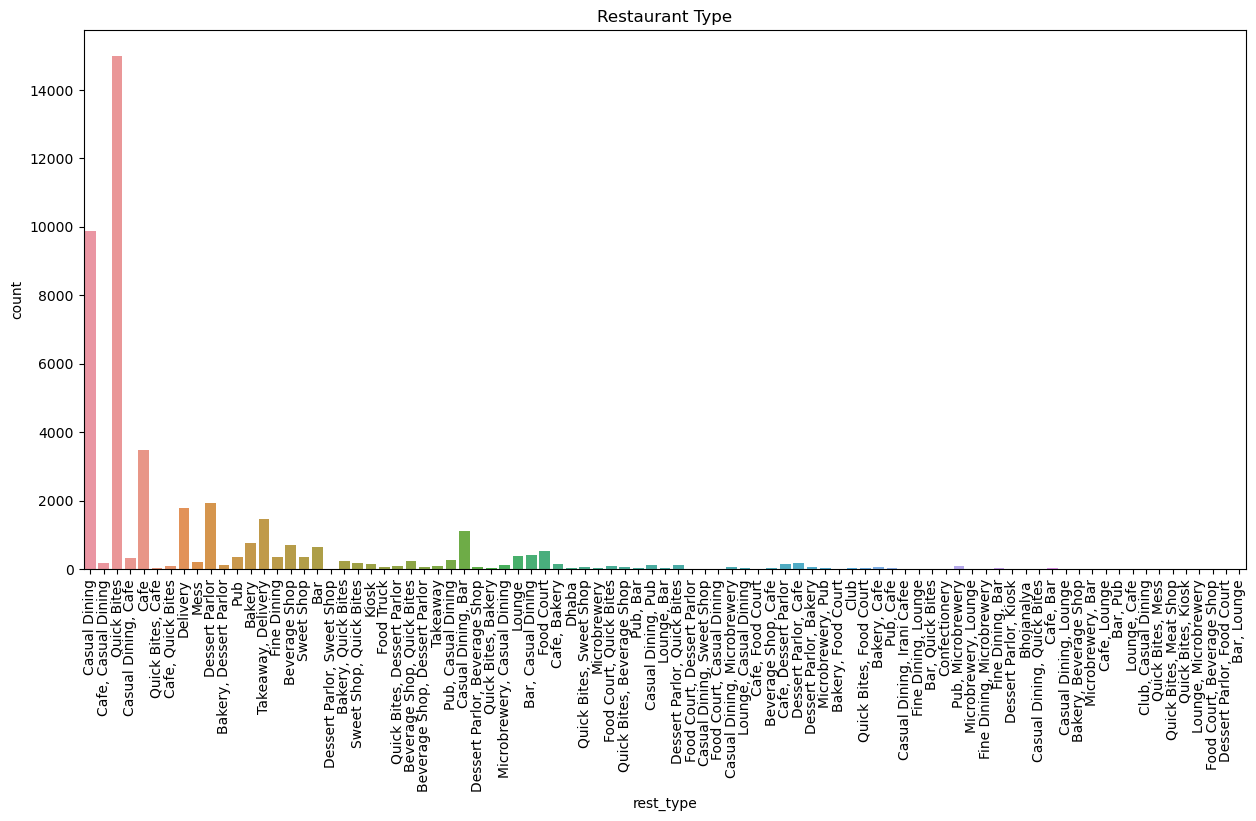

In [22]:
import seaborn as sns
plt.figure(figsize = (15,7))
sns.countplot(x=df['rest_type'])
plt.xticks(rotation=90)
plt.title('Restaurant Type')
plt.show()

From the above graph, we can see that most restaurant types are casual dining, quick bites, and cafe.

### Gaussian Rest type and Rating

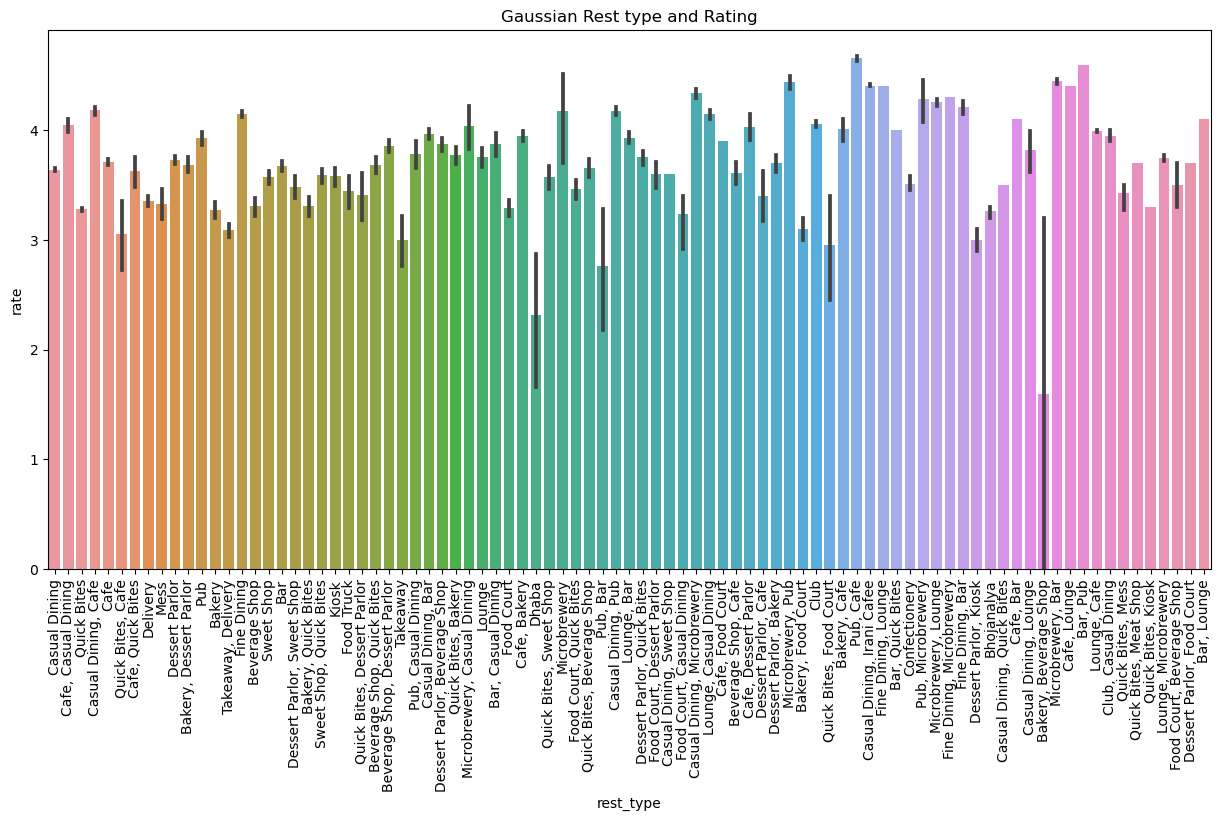

In [23]:
plt.figure(figsize = (15,7))
sns.barplot(data=df, x = 'rest_type' , y = 'rate')
plt.xticks(rotation=90)
plt.title('Gaussian Rest type and Rating')
plt.show()

While comparing restaurant types with ratings, we can see from the above graph that bakery, beverage shop, and dhaba have low ratings.

### Types of Services

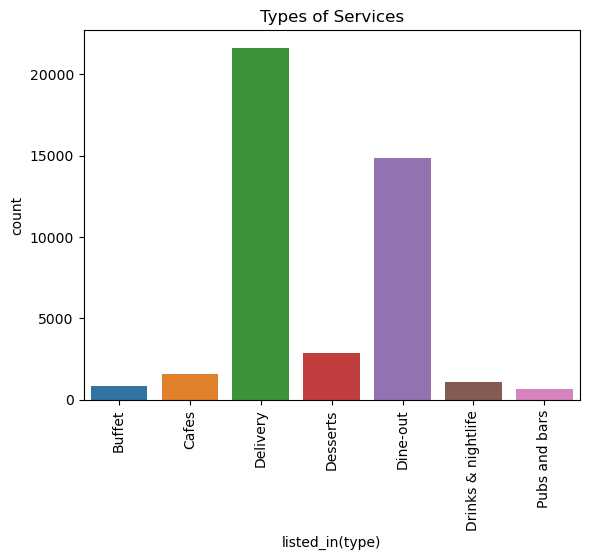

In [24]:
sns.countplot(x=df['listed_in(type)'])
plt.xticks(rotation=90)
plt.title('Types of Services')
plt.show()

From the above graph, we can see that delivery and dine-out services are more popular.

### Cost of Restaurant

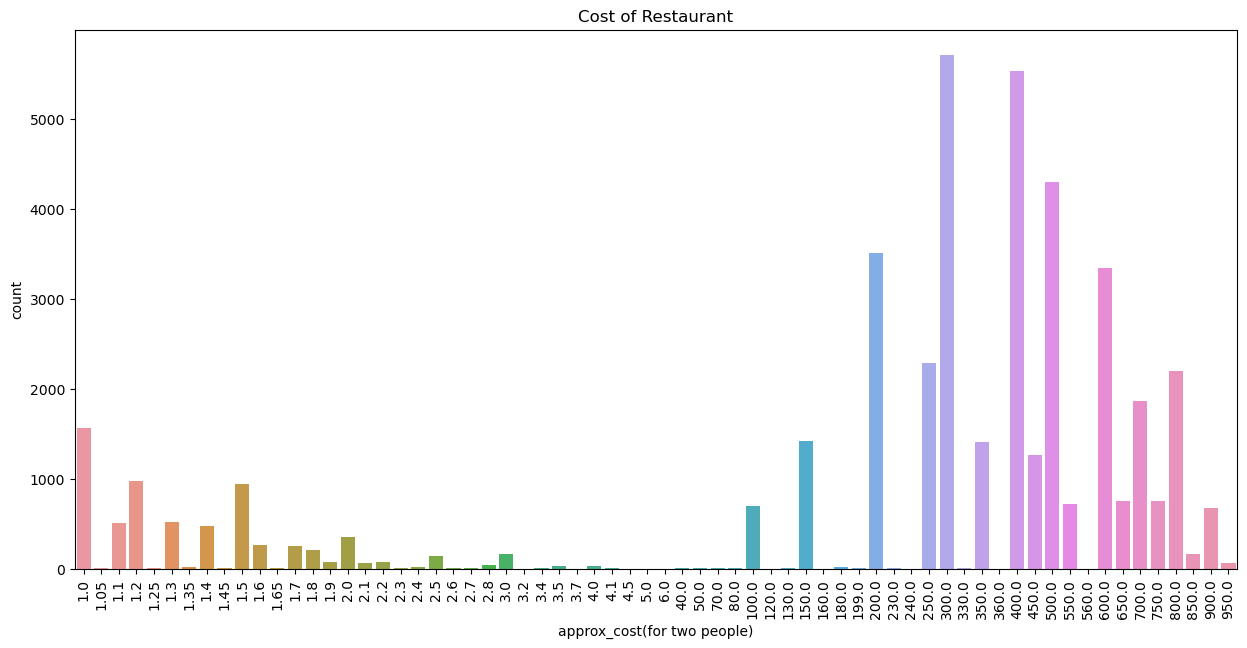

In [25]:
plt.figure(figsize = (15,7))
sns.countplot(x=df['approx_cost(for two people)'])
plt.xticks(rotation=90)
plt.title('Cost of Restaurant')
plt.show()

From the above graph, we can see that the average cost for two people is around 400.

### No. of restaurants in a Location

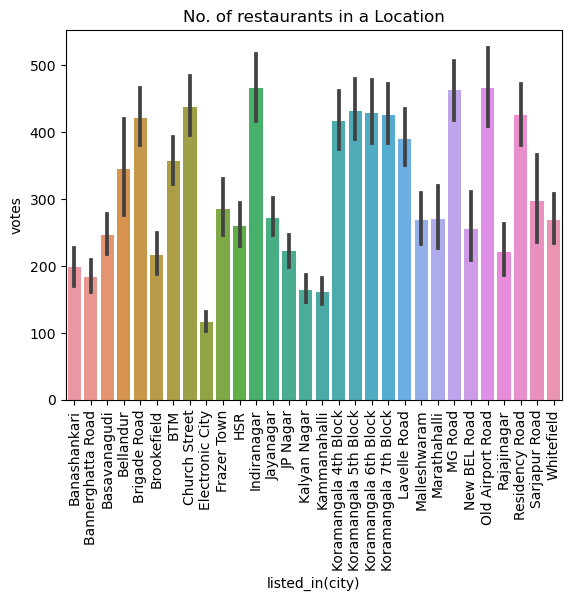

In [26]:
import matplotlib as mpl
sns.barplot(data=df, x = 'listed_in(city)' , y = 'votes')
plt.xticks(rotation=90)
plt.title('No. of restaurants in a Location')
plt.show()

From the above graph, we can see that Indiranagar has more restaurants and Electronic City has very few.

## Decoading

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43499 entries, 0 to 51716
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   address                      43499 non-null  object 
 1   name                         43499 non-null  object 
 2   online_order                 43499 non-null  object 
 3   book_table                   43499 non-null  object 
 4   rate                         43499 non-null  float64
 5   votes                        43499 non-null  int64  
 6   location                     43499 non-null  object 
 7   rest_type                    43499 non-null  object 
 8   cuisines                     43499 non-null  object 
 9   approx_cost(for two people)  43499 non-null  float64
 10  reviews_list                 43499 non-null  object 
 11  menu_item                    43499 non-null  object 
 12  listed_in(type)              43499 non-null  object 
 13  listed_in(city) 

Decoding the categorical variable to numerical variable

In [28]:
df['online_order'].value_counts()

Yes    28175
No     15324
Name: online_order, dtype: int64

In [29]:
map_dict_online_order = {"Yes":1,"No":0}
df['online_order']=df['online_order'].map(map_dict_online_order)

In [30]:
df['online_order'].value_counts()

1    28175
0    15324
Name: online_order, dtype: int64

In [31]:
df['book_table'].value_counts()

No     37073
Yes     6426
Name: book_table, dtype: int64

In [32]:
map_dict_book_table = {"Yes":1,"No":0}
df['book_table']=df['book_table'].map(map_dict_book_table)

In [33]:
df['book_table'].value_counts()

0    37073
1     6426
Name: book_table, dtype: int64

In [34]:
df.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,1,1,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,1,0,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,1,0,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,0,0,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,0,0,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43499 entries, 0 to 51716
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   address                      43499 non-null  object 
 1   name                         43499 non-null  object 
 2   online_order                 43499 non-null  int64  
 3   book_table                   43499 non-null  int64  
 4   rate                         43499 non-null  float64
 5   votes                        43499 non-null  int64  
 6   location                     43499 non-null  object 
 7   rest_type                    43499 non-null  object 
 8   cuisines                     43499 non-null  object 
 9   approx_cost(for two people)  43499 non-null  float64
 10  reviews_list                 43499 non-null  object 
 11  menu_item                    43499 non-null  object 
 12  listed_in(type)              43499 non-null  object 
 13  listed_in(city) 

In [36]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["rest_type"] = le.fit_transform(df['rest_type'])
df["location"] = le.fit_transform(df['location'])
df["cuisines"] = le.fit_transform(df['cuisines'])
df["listed_in(type)"] = le.fit_transform(df['listed_in(type)'])
df["menu_item"] = le.fit_transform(df['menu_item'])

In [37]:
df.drop(['address','name','reviews_list','listed_in(city)'],axis=1,inplace=True)

In [38]:
df.head()

,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),menu_item,listed_in(type)
0,1,1,4.1,775,1,24,1986,800.0,8559,0
1,1,0,4.1,787,1,24,859,800.0,8559,0
2,1,0,3.8,918,1,19,688,800.0,8559,0
3,0,0,3.7,88,1,73,2335,300.0,8559,0
4,0,0,3.8,166,4,24,2015,600.0,8559,0


### Split the data

In [39]:
X = df.drop('rate', axis=1)
y = df['rate']

In [40]:
X.shape, y.shape

((43499, 9), (43499,))

In [41]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1)

In [42]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((32624, 9), (10875, 9), (32624,), (10875,))

## Linear Regresssion

In [43]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

In [44]:
lr = LinearRegression()
model = lr.fit(x_train, y_train)
y_pred_lr = lr.predict(x_test)

Metrics for linear regression

In [45]:
mean_absolute_error(y_test, y_pred_lr)

0.5099584410864286

In [46]:
mean_squared_error(y_test, y_pred_lr)

0.7735522204114094

In [47]:
np.sqrt(mean_squared_error(y_test, y_pred_lr))

0.879518175145579

In [48]:
r2_score(y_test, y_pred_lr)

0.13141805386394056

In [49]:
model.coef_

array([ 2.27617728e-01,  3.36997969e-01,  2.26466027e-04,  1.76135634e-03,
       -3.84926513e-03, -1.53877045e-05, -7.72248229e-05, -7.14622964e-06,
        1.74029187e-02])

In [50]:
x_train.columns

Index(['online_order', 'book_table', 'votes', 'location', 'rest_type',
       'cuisines', 'approx_cost(for two people)', 'menu_item',
       'listed_in(type)'],
      dtype='object')

## Decision Tree Regression

In [51]:
from sklearn.tree import DecisionTreeRegressor
DTR=DecisionTreeRegressor(min_samples_leaf=3)
model = DTR.fit(x_train,y_train)
y_predict=DTR.predict(x_test)

Metrics for linear regression

In [52]:
mean_absolute_error(y_test, y_predict)

0.08068705710636755

In [53]:
mean_squared_error(y_test, y_predict)

0.03916818856598407

In [54]:
np.sqrt(mean_squared_error(y_test, y_predict))

0.19790954642458275

In [55]:
r2_score(y_test,y_predict)

0.9560200584348748

## Random Forest Regression

In [56]:
from sklearn.ensemble import RandomForestRegressor
RForest=RandomForestRegressor(n_estimators=500,random_state=329,min_samples_leaf=3)
RForest.fit(x_train,y_train)
y_predict=RForest.predict(x_test)

Metrics for linear regression

In [57]:
mean_absolute_error(y_test, y_predict)

0.08391789725329553

In [58]:
mean_squared_error(y_test, y_predict)

0.029226873343268345

In [59]:
np.sqrt(mean_squared_error(y_test, y_predict))

0.17095868899610908

In [60]:
r2_score(y_test,y_predict)

0.9671826492664364